# Exploración de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from math import sqrt

In [2]:
root = 'España en México.xls'

df = pd.read_excel(root, parse_dates=True, header=1 )

df = df.drop([0], axis = 0)
df.rename(columns={'Unnamed: 1':'industry',
                        'Elemento': 'variables'}, inplace=True)
df['variables'] = df['variables'].replace(np.nan, 'Inversion Es(millones€)')
df['variables'] = df['variables'].replace('MEXICO', 'Inversion Es(millones€)')

df.head()

WARNING *** file size (32704) not 512 + multiple of sector size (512)


/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


,variables,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Inversion Es(millones€),"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,Inversion Es(millones€),02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,Inversion Es(millones€),03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Inversion Es(millones€),"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Inversion Es(millones€),06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [3]:
print('Tamaño del DF:', df.shape)
print('Número de valores nulos en cada columna:',df.isnull().sum())

Tamaño del DF: (88, 30)
Número de valores nulos en cada columna: variables     0
industry      0
1993         66
1994         63
1995         66
1996         58
1997         55
1998         58
1999         58
2000         55
2001         53
2002         56
2003         60
2004         57
2005         57
2006         59
2007         48
2008         50
2009         46
2010         47
2011         41
2012         48
2013         47
2014         45
2015         40
2016         29
2017         27
2018         30
2019         44
2020         55
dtype: int64


In [4]:
df.dtypes

variables    object
industry     object
1993         object
1994         object
1995         object
1996         object
1997         object
1998         object
1999         object
2000         object
2001         object
2002         object
2003         object
2004         object
2005         object
2006         object
2007         object
2008         object
2009         object
2010         object
2011         object
2012         object
2013         object
2014         object
2015         object
2016         object
2017         object
2018         object
2019         object
2020         object
dtype: object

In [5]:
df.head()

,variables,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Inversion Es(millones€),"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,Inversion Es(millones€),02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,Inversion Es(millones€),03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Inversion Es(millones€),"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Inversion Es(millones€),06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [6]:
%store df

Stored 'df' (DataFrame)


In [8]:
df_mex = df.groupby('variables').sum()


In [9]:
df_mex = df_mex.drop(['industry'], axis=1)

In [10]:
df_mex

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
variables,,,,,,,,,,,,,,,,,,,,,
Inversion Es(millones€),47135.97,17017.75,8263.11,13622.5,46830.67,35710.18,50166.76,69985.63,35130.27,30762.74,...,43890.13,554693.17,309421.42,1123315.43,921643.33,1763920.89,504255.3,295173.1,1091255.39,418336.16


In [11]:
df_mex = df_mex.div(1000)
df_mex

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
variables,,,,,,,,,,,,,,,,,,,,,
Inversion Es(millones€),47.13597,17.01775,8.26311,13.6225,46.83067,35.71018,50.16676,69.98563,35.13027,30.76274,...,43.89013,554.69317,309.42142,1123.31543,921.64333,1763.92089,504.2553,295.1731,1091.25539,418.33616


In [21]:
df_mex.index.name = 'Variables'
df_mex.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Variables,,,,,,,,,,,,,,,,,,,,,
Inversion Es(millones€),47.13597,17.01775,8.26311,13.6225,46.83067,35.71018,50.16676,69.98563,35.13027,30.76274,...,43.89013,554.69317,309.42142,1123.31543,921.64333,1763.92089,504.2553,295.1731,1091.25539,418.33616


In [22]:
%store df_mex

Stored 'df_mex' (DataFrame)


In [25]:
%store -r var_economicas #Variable de 'Variables_economicas.ipynb'

no stored variable #Variable de Variables_economicas.ipynb


In [26]:
var_economicas.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
variables,,,,,,,,,,,,,,,,,,,,,
Desempleo (%),3.3700,4.44000,7.100000,5.47000,4.2400,3.730000,2.600000,2.650000,2.630000,3.000000,...,5.170000,4.89000,4.910000,4.810000,4.310000,3.860000,3.420000,3.280000,3.480000,4.71
PIB(%anual),1.9400,4.94000,-6.290000,6.77000,6.8500,5.160000,2.750000,4.940000,-0.400000,-0.040000,...,3.660000,3.64000,1.350000,2.850000,3.290000,2.630000,2.110000,2.190000,-0.050000,NaN
IPC(%anual),9.7500,6.97000,35.000000,34.38000,20.6300,15.930000,16.590000,9.490000,6.370000,5.030000,...,3.410000,4.11000,3.810000,4.020000,2.720000,2.820000,6.040000,4.900000,3.640000,NaN
IED(millones€),3903.5766,8807.62575,7113.280743,7275.91376,11720.0223,10876.417462,13837.879512,19505.442424,33742.372813,22910.101445,...,18417.420523,13792.77396,36945.696358,23641.594688,32903.800387,36866.412186,27512.788897,32822.136842,26174.932557,NaN


In [27]:
df_mex_var = pd.concat([df_mex, var_economicas], axis=0, join='inner')

In [28]:
df_mex_var.columns

Index(['1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [29]:
df_mex_var.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Inversion Es(millones€),47.13597,17.01775,8.263110,13.62250,46.83067,35.710180,50.166760,69.985630,35.130270,30.762740,...,43.890130,554.69317,309.421420,1123.315430,921.643330,1763.920890,504.255300,295.173100,1091.255390,418.33616
Desempleo (%),3.37000,4.44000,7.100000,5.47000,4.24000,3.730000,2.600000,2.650000,2.630000,3.000000,...,5.170000,4.89000,4.910000,4.810000,4.310000,3.860000,3.420000,3.280000,3.480000,4.71000
PIB(%anual),1.94000,4.94000,-6.290000,6.77000,6.85000,5.160000,2.750000,4.940000,-0.400000,-0.040000,...,3.660000,3.64000,1.350000,2.850000,3.290000,2.630000,2.110000,2.190000,-0.050000,NaN
IPC(%anual),9.75000,6.97000,35.000000,34.38000,20.63000,15.930000,16.590000,9.490000,6.370000,5.030000,...,3.410000,4.11000,3.810000,4.020000,2.720000,2.820000,6.040000,4.900000,3.640000,NaN
IED(millones€),3903.57660,8807.62575,7113.280743,7275.91376,11720.02230,10876.417462,13837.879512,19505.442424,33742.372813,22910.101445,...,18417.420523,13792.77396,36945.696358,23641.594688,32903.800387,36866.412186,27512.788897,32822.136842,26174.932557,NaN


In [30]:
df_mex_var = df_mex_var.transpose()

In [31]:
df_mex_var.describe()

,Inversion Es(millones€),Desempleo (%),PIB(%anual),IPC(%anual),IED(millones€)
count,28.000000,28.000000,27.000000,27.000000,27.000000
mean,286.633198,4.098571,2.360370,8.556296,19981.006275
std,435.089248,1.029861,3.014023,8.752879,9300.402759
min,8.263110,2.600000,-6.290000,2.720000,3903.576600
25%,41.215623,3.450000,1.400000,3.980000,13760.968839
50%,79.032265,3.865000,2.630000,4.900000,19505.442424
75%,336.650105,4.830000,4.210000,8.230000,24908.263622
max,1763.920890,7.100000,6.850000,35.000000,36945.696358


In [32]:
df_mex_var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1993 to 2020
Data columns (total 5 columns):
Inversion Es(millones€)    28 non-null float64
Desempleo (%)              28 non-null float64
PIB(%anual)                27 non-null float64
IPC(%anual)                27 non-null float64
IED(millones€)             27 non-null float64
dtypes: float64(5)
memory usage: 2.6+ KB


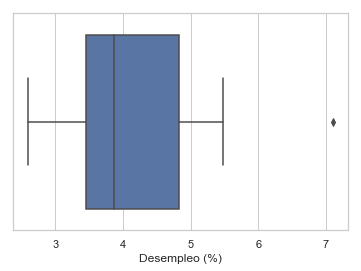

In [33]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_mex_var['Desempleo (%)'])

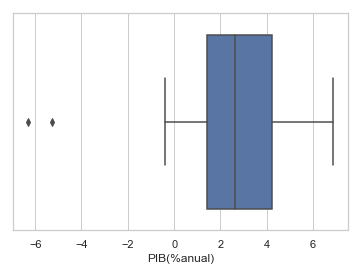

In [40]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_mex_var['PIB(%anual)'])

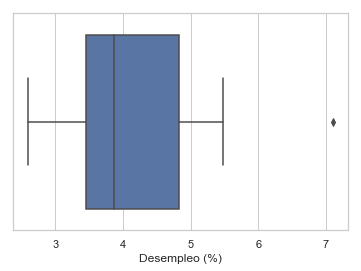

In [36]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_mex_var['Desempleo (%)'])

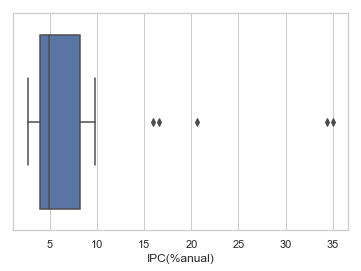

In [37]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_mex_var['IPC(%anual)'])

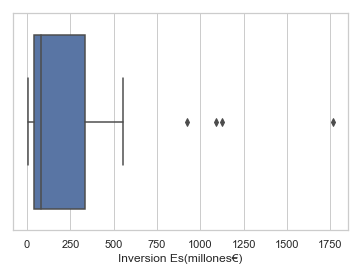

In [38]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_mex_var['Inversion Es(millones€)'])

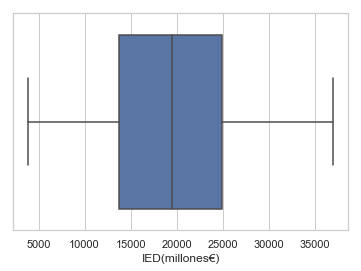

In [39]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_mex_var['IED(millones€)'])